In [1]:
#source ../TRDG/tdrg/bin/activate

# Looking at Liptons CF dataset
import pandas as pd
import numpy as np

#path  = "/Users/diegoolano/Documents/UT/semester6/to_read_RL_proj_etc/evaluating/lipton-data/sentiment/"
path = "data/lipton/sentiment/"
origd = path + "orig/"
newd  = path + "new/"
combd = path + "combined/"    #each contains train/dev/test.tsv files

In [3]:
#Users/diegoolano/Documents/UT/semester6/to_read_RL_proj_etc/evaluating/TRDG/tdrg/lib/python3.7/site-packages
#!pip list

In [12]:
# /Users/diegoolano/Documents/UT/semester6/to_read_RL_proj_etc/evaluating/TRDG/tdrg/lib/python3.7/site-packages/
# install pytorch
#!pip3 install torch torchvision

# install huggingface  ( via https://github.com/huggingface/transformers/issues/2831)
#!pip install transformers==2.4.1

In [2]:
#quick dirty look at max token size per each
from transformers import BertModel, BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [3]:
def get_max_tokens_info(df):
    max_tokens = 0
    max_tokens_index = -1
    lens = []
    for i in range(df.shape[0]):
        #read and tokenize line
        cur_example = df.Text.values[i]
        text_tokens = tokenizer.tokenize(cur_example)
        lens.append(len(text_tokens))
        if len(text_tokens) > max_tokens:
            max_tokens = len(text_tokens)
            max_tokens_index = i
    return (max_tokens, max_tokens_index, lens)

In [4]:
# Look at orig LIPTON data 
orig_train = pd.read_table(origd+"train.tsv",sep="\t")   
orig_dev = pd.read_table(origd+"dev.tsv",sep="\t")
orig_test = pd.read_table(origd+"test.tsv",sep="\t")

print("ORIG:")
print("Train",orig_train.shape)
print("Dev",orig_dev.shape)
print("Test",orig_test.shape)

og_train_stats = get_max_tokens_info(orig_train)
og_dev_stats = get_max_tokens_info(orig_dev)
og_test_stats = get_max_tokens_info(orig_test)

ORIG:
Train (1707, 2)
Dev (245, 2)
Test (488, 2)


In [5]:
# Look at new LIPTON data
print("NEW:")
new_train = pd.read_table(newd+"train.tsv",sep="\t")   
new_dev = pd.read_table(newd+"dev.tsv",sep="\t")
new_test = pd.read_table(newd+"test.tsv",sep="\t")

print("Train",new_train.shape)
print("Dev",new_dev.shape)
print("Test",new_test.shape)

new_train_stats = get_max_tokens_info(new_train)
new_dev_stats = get_max_tokens_info(new_dev)
new_test_stats = get_max_tokens_info(new_test)

NEW:
Train (1707, 2)
Dev (245, 2)
Test (488, 2)


In [10]:
!ls ../DRG/

ls: cannot access '../DRG/': No such file or directory


In [12]:
# LOOK AT YELP DATA
#! ls ../DRG/data/yelp/
#cat sentiment.train.0 sentiment.train.1 > sentiment.train
print("NEW:")
yelpd = "../DRG/data/yelp/"
yelp_train = pd.read_table(yelpd+"sentiment.train",sep="\t",header=None, names=["Text"])   
yelp_dev = pd.read_table(yelpd+"sentiment.dev",sep="\t",header=None, names=["Text"])
yelp_test = pd.read_table(yelpd+"sentiment.test",sep="\t",header=None, names=["Text"])

print("Train",yelp_train.shape)
print("Dev",yelp_dev.shape)
print("Test",yelp_test.shape)

yelp_train_stats = get_max_tokens_info(yelp_train)
yelp_dev_stats = get_max_tokens_info(yelp_dev)
yelp_test_stats = get_max_tokens_info(yelp_test)

NEW:
Train (443259, 1)
Dev (4000, 1)
Test (1000, 1)


In [15]:
# LOOK AT AMAZON DATA
amazond = "../DRG/data/amazon/"
amazon_train = pd.read_table(amazond+"sentiment.train",sep="\t",header=None, names=["Text"])   
amazon_dev = pd.read_table(amazond+"sentiment.dev",sep="\t",header=None, names=["Text"])
amazon_test = pd.read_table(amazond+"sentiment.test",sep="\t",header=None, names=["Text"])

print("Train",amazon_train.shape)
print("Dev",amazon_dev.shape)
print("Test",amazon_test.shape)

amazon_train_stats = get_max_tokens_info(amazon_train)
amazon_dev_stats = get_max_tokens_info(amazon_dev)
amazon_test_stats = get_max_tokens_info(amazon_test)

Train (554997, 1)
Dev (2000, 1)
Test (1000, 1)


In [16]:
# LOOK AT IMG CAPTION
captiond = "../DRG/data/imagecaption/"
caption_train = pd.read_table(captiond+"sentiment.train",sep="\t",header=None, names=["Text"],encoding = "iso-8859-1")   
caption_dev = pd.read_table(captiond+"sentiment.dev",sep="\t",header=None, names=["Text"],encoding = "utf-8")
caption_test = pd.read_table(captiond+"sentiment.test",sep="\t",header=None, names=["Text"],encoding = "utf-8")

print("Train",caption_train.shape)
print("Dev",caption_dev.shape)
print("Test",caption_test.shape)

caption_train_stats = get_max_tokens_info(caption_train)
caption_dev_stats = get_max_tokens_info(caption_dev)
caption_test_stats = get_max_tokens_info(caption_test)

Train (12000, 1)
Dev (1000, 1)
Test (600, 1)


In [41]:
# LOOK AT ACL IMDB processedata
imdbd = "data/aclImdb/bert_classifier_training/"
imdb_train = pd.read_table(imdbd+"train.csv",sep="\t",header=None, names=["Text","Sentiment"]) #, encoding = "utf-8")   
imdb_dev = pd.read_table(imdbd+"dev.csv",sep="\t",header=None, names=["Text","Sentiment"]) #, encoding = "utf-8")
imdb_test = pd.read_table(imdbd+"test.csv",sep="\t",header=None, names=["Text","Sentiment"]) #, encoding = "utf-8")

print("Train",imdb_train.shape)
print("Dev",imdb_dev.shape)
print("Test",imdb_test.shape)

print(imdb_train.head())
imdb_train_stats = get_max_tokens_info(imdb_train)
imdb_dev_stats = get_max_tokens_info(imdb_dev)
imdb_test_stats = get_max_tokens_info(imdb_test)

Train (25000, 2)
Dev (12500, 2)
Test (12500, 2)
                                                Text  Sentiment
0  I cannot believe the same guy directed this cr...          0
1  i saw this film by accident and this movie was...          0
2  First let me say that I am not a Dukes fan, bu...          0
3  Higher Learning says its OK for blacks to torm...          0
4  I have never understood the appeal of this sho...          0


In [44]:
def show_stats(dfs, name, thresh):
    train_stats, dev_stats, test_stats = dfs
    print(name + " (train/dev/test)")
    print("max seq len:",train_stats[0],dev_stats[0],test_stats[0])
    print("mean :",round(np.mean(train_stats[2]),3),round(np.mean(dev_stats[2]),3),round(np.mean(test_stats[2]),3))
    print("median :",np.median(train_stats[2]),np.median(dev_stats[2]),np.median(test_stats[2]))
    print("min seq len:",np.min(train_stats[2]),np.min(dev_stats[2]),np.min(test_stats[2]))
    print("stddev :",round(np.std(train_stats[2]),3),round(np.std(dev_stats[2]),3),round(np.std(test_stats[2]),3))
    print("num < thresh:", 
          round(sum([1 if t < thresh else 0 for t in train_stats[2]])/len(train_stats[2]),3), 
          round(sum([1 if t < thresh else 0 for t in dev_stats[2]])/len(dev_stats[2]),3),
          round(sum([1 if t < thresh else 0 for t in test_stats[2]])/len(test_stats[2]),3))
    print("")
    
all_og = [og_train_stats, og_dev_stats, og_test_stats]
all_nw = [new_train_stats, new_dev_stats, new_test_stats]
all_yp = [yelp_train_stats, yelp_dev_stats, yelp_test_stats]
all_az = [amazon_train_stats, amazon_dev_stats, amazon_test_stats]
all_ic = [caption_train_stats, caption_dev_stats, caption_test_stats]
all_im = [imdb_train_stats, imdb_dev_stats, imdb_test_stats]

thresh = 490
show_stats(all_og, "Original",thresh)
show_stats(all_nw, "New",thresh)
show_stats(all_yp, "Yelp",thresh)
show_stats(all_az, "Amazon",thresh)
show_stats(all_ic, "Image Caption",thresh)
show_stats(all_im, "ACL IMDB",thresh)

#so for LIPTON: max len is 490 !   All of these do fit in BERT then

Original (train/dev/test)
max seq len: 490 468 455
mean : 215.811 221.388 216.373
median : 198.0 211.0 199.5
min seq len: 22 40 36
stddev : 90.676 92.466 87.528
num < thresh: 0.999 1.0 1.0

New (train/dev/test)
max seq len: 486 438 465
mean : 213.484 218.971 214.088
median : 195.0 210.0 201.0
min seq len: 19 41 36
stddev : 89.857 90.588 86.247
num < thresh: 1.0 1.0 1.0

Yelp (train/dev/test)
max seq len: 40 24 20
mean : 9.606 9.66 10.994
median : 9.0 10.0 11.0
min seq len: 1 1 6
stddev : 4.124 4.179 3.157
num < thresh: 1.0 1.0 1.0

Amazon (train/dev/test)
max seq len: 72 32 25
mean : 16.007 15.916 12.838
median : 16.0 15.5 13.0
min seq len: 8 9 9
stddev : 4.394 4.262 2.44
num < thresh: 1.0 1.0 1.0

Image Caption (train/dev/test)
max seq len: 26 24 14
mean : 14.875 14.823 10.033
median : 15.0 15.0 10.0
min seq len: 4 7 6
stddev : 2.721 2.71 2.06
num < thresh: 1.0 1.0 1.0

ACL IMDB (train/dev/test)
max seq len: 3129 3097 3171
mean : 314.461 307.463 307.308
median : 233.0 230.0 230.0
min 

In [45]:
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
import matplotlib.pyplot as plt

def dense_plot(dfs, title=''):
    plt.figure(figsize=(20,5))
    ax = plt.subplot(1, 3, 1)
    ax.hist(dfs[0][2], bins = 100 ,color = 'blue', edgecolor = 'black')
    ax.set_title(title + "Train")
    ax.set_xlabel('seq len', size = 22)
    ax.set_ylabel('num', size= 22)
    
    ax = plt.subplot(1, 3, 2)
    ax.hist(dfs[1][2], bins = 50 ,color = 'blue', edgecolor = 'black')
    ax.set_title(title + "Dev")
    ax.set_xlabel('seq len', size = 22)
    ax.set_ylabel('num', size= 22)

    ax = plt.subplot(1, 3, 3)
    ax.hist(dfs[2][2], bins = 70 ,color = 'blue', edgecolor = 'black')
    ax.set_title(title + "Test")
    ax.set_xlabel('seq len', size = 22)
    ax.set_ylabel('num', size= 22)

    plt.tight_layout()
    plt.show()

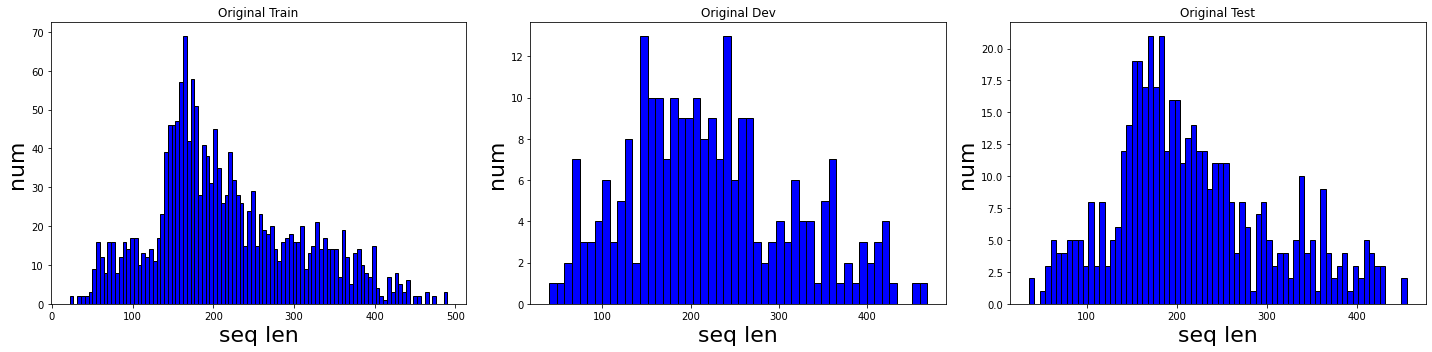

In [25]:
dense_plot(all_og, "Original ")

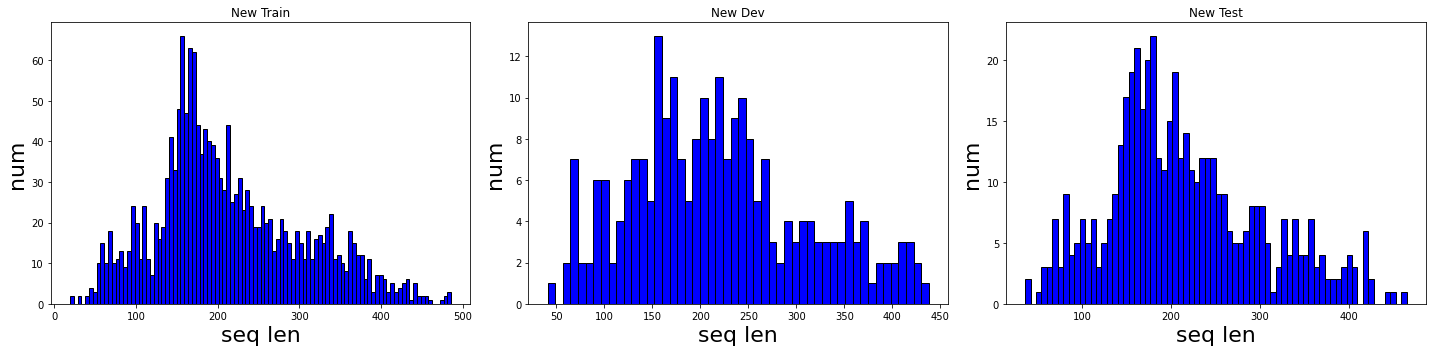

In [27]:
dense_plot(all_nw, "New ")

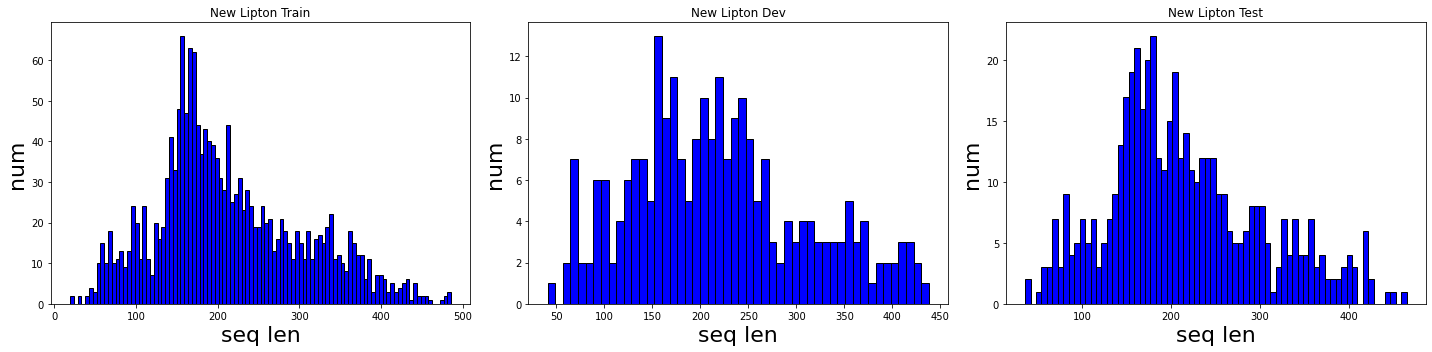

In [11]:
dense_plot(all_nw, "New Lipton ")

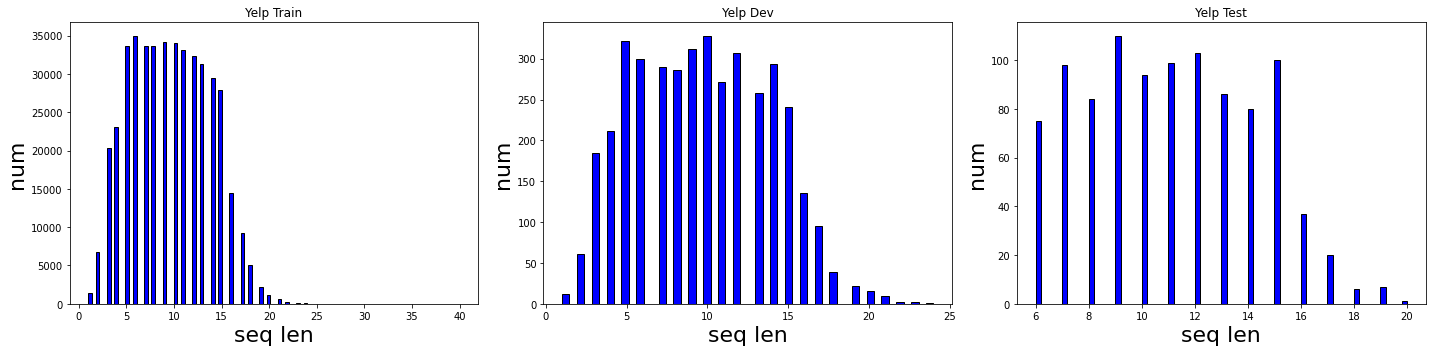

In [12]:
dense_plot(all_yp, "Yelp ")

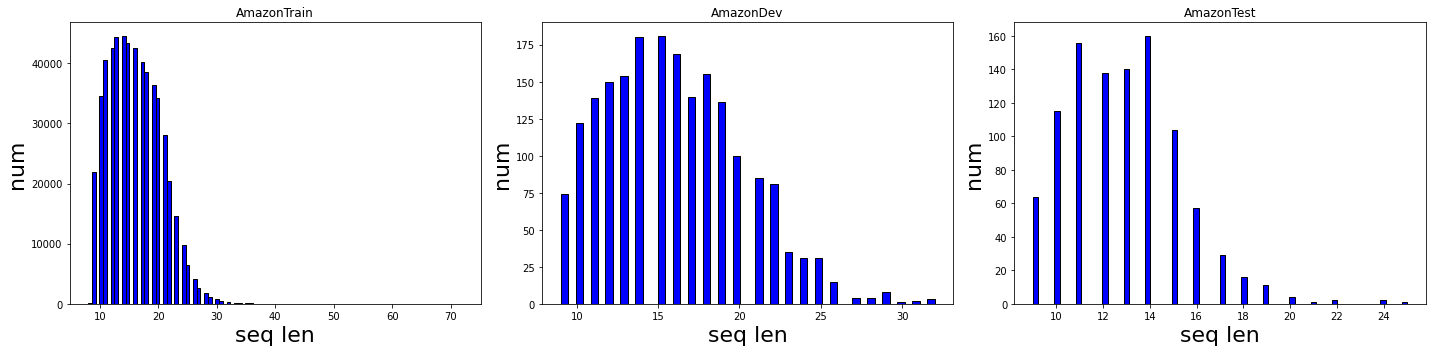

In [13]:
dense_plot(all_az, "Amazon")

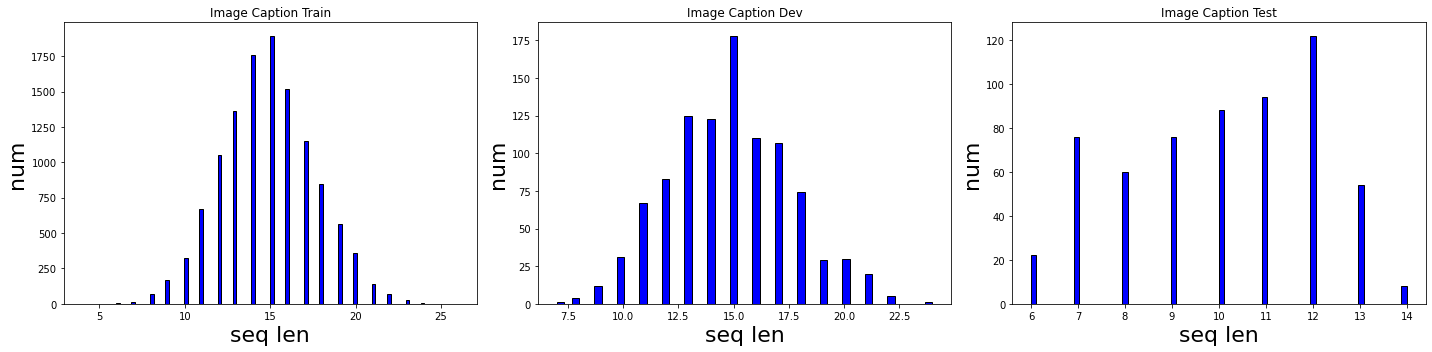

In [14]:
dense_plot(all_ic, "Image Caption ",)

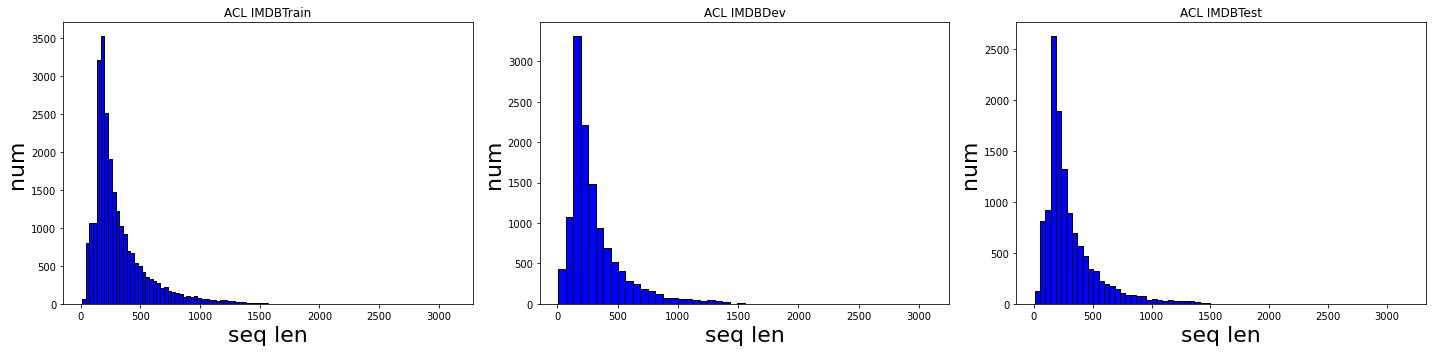

In [46]:
dense_plot(all_im, "ACL IMDB",)